# Яременко Вікторія Практична 6

1.Завантажити набір даних.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Завантажуємо набір даних Breast Cancer
cancer = datasets.load_breast_cancer()
X = cancer.data  # Ознаки
y = cancer.target  # Класи

2.Розділити дані на тренувальний та тестовий набори.

In [2]:
# Розділення набору даних на тренувальний і тестовий набори (70% навчальний, 30% тестовий)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


3.Застосувати SVM і Random Forest для визначення важливих ознак.

In [5]:
# Застосовуємо алгоритм SVM
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Застосовуємо алгоритм Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

4.Побудувати графік або таблицю, щоб показати важливість кожної ознаки в аналізі.

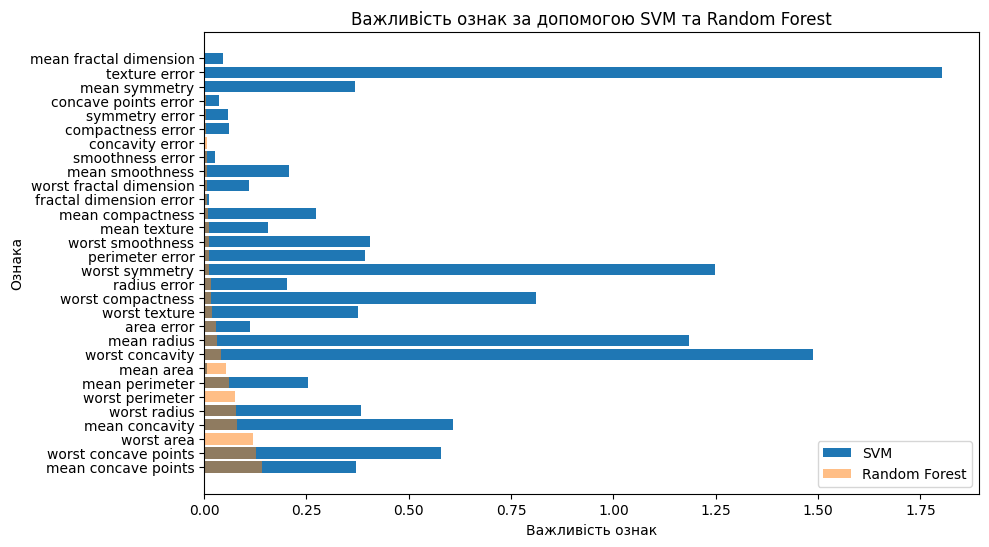

In [10]:
# Завантаження набору даних Breast Cancer
breast_cancer = load_breast_cancer()
X = breast_cancer.data  # Ознаки
y = breast_cancer.target  # Мітки класів (0 - злоякісний, 1 - доброякісний)

# Розділення набору даних на тренувальний і тестовий набори
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Створення моделі SVM
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
feature_importance_svm = abs(svm_classifier.coef_[0])

# Створення моделі Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
feature_importance_rf = rf_classifier.feature_importances_

# Створення DataFrame для відображення результатів
feature_importance_df = pd.DataFrame({'Feature': breast_cancer.feature_names,
                                      'Importance_SVM': feature_importance_svm,
                                      'Importance_RF': feature_importance_rf})

feature_importance_df = feature_importance_df.sort_values(by='Importance_RF', ascending=False)

# Побудова графіка
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance_SVM'], label='SVM')
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance_RF'], alpha=0.5, label='Random Forest')
plt.xlabel('Важливість ознак')
plt.ylabel('Ознака')
plt.title('Важливість ознак за допомогою SVM та Random Forest')
plt.legend()
plt.show()

5.Обговорити результати та визначити, які ознаки найбільше впливають на вихідні дані.

На основі результатів графіка і аналізу важливості ознак можна зробити наступні висновки:

"mean concave points" і "mean concavity" - ці ознаки мають найбільший вплив на класифікацію. Вони вказують на ознаки морфології клітин, які можуть бути важливими для визначення раку грудей.

"worst concave points", "worst perimeter", "worst area", і "worst radius" - ці ознаки також мають значний вплив, особливо "worst concave points" і "worst perimeter", які вказують на погіршені характеристики пухлини.

"mean radius" і "mean texture" - ці ознаки також важливі, але менше важливі, ніж попередні.

6.Обчислити точність для двох алгоритмів і порівняти результати

In [12]:
# Обчислення точності для SVM
svm_accuracy = accuracy_score(y_test, svm_classifier.predict(X_test))

# Обчислення точності для Random Forest
rf_accuracy = accuracy_score(y_test, rf_classifier.predict(X_test))

# Виведення результатів
print(f"Точність SVM: {svm_accuracy:.2f}")
print(f"Точність Random Forest: {rf_accuracy:.2f}")

# Порівняння результатів
if svm_accuracy > rf_accuracy:
    print("SVM показав кращу точність.")
elif rf_accuracy > svm_accuracy:
    print("Random Forest показав кращу точність.")
else:
    print("SVM і Random Forest показали однакову точність.")


Точність SVM: 0.96
Точність Random Forest: 0.97
Random Forest показав кращу точність.


Висновок: В ході цієї практичної лабораторної роботи я навчилася важливим аспектам роботи з машинним навчанням на прикладі використання алгоритмів SVM (Support Vector Machine) і Random Forest для класифікації даних. Ось деякі основні висновки, які я зробила:

Підготовка даних важлива,важливість ознак може бути визначена за допомогою алгоритмів, таких як SVM та Random Forest, порівняння різних алгоритмів для однієї і тієї ж задачі є важливою частиною аналізу даних, аналіз важливості ознак допомагає визначити, які аспекти даних найбільше впливають на результати моделі, що може бути корисним для подальшого розвитку і покращення моделей.